In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('housing-prices-35.csv')
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].astype('int64') // 10**9  

In [53]:
data = pd.get_dummies(data, columns=['category'], drop_first=True)
data = data.drop(['position_wgs', 'shape_wgs'], axis=1)
#Here we define the caracteristics (X) and the target (y)
X = data.drop(columns=['price'])
y = data['price']
#We put the caracteristics on the right scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Then we split the data between training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# We create and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# We do the prediction
y_pred = rf_model.predict(X_test)

# Finally, we calculate the mean squared error and r2 to be able to see how accurate our model is.
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [55]:
print('RMSE:',np.sqrt(mse_rf))
print('R2:',r2_rf)

RMSE: 120831.57323013242
R2: 0.6849993957872555


58748     36673.8400
63080         0.0000
110614     2039.0000
50077       700.0000
70088     22147.8000
             ...    
56406      8312.1800
133245       79.0000
27772         0.0000
144099    13581.7985
35599     46117.3800
Name: price, Length: 29794, dtype: float64


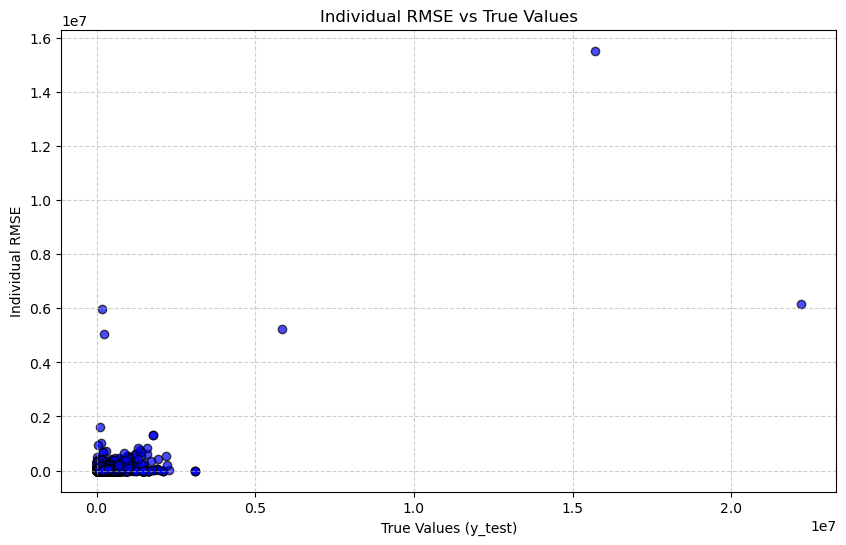

In [56]:
individual_rmse = np.sqrt((y_pred - y_test) ** 2)

print(individual_rmse)
plt.figure(figsize=(10, 6))

plt.scatter(y_test, individual_rmse, color='blue', alpha=0.7, edgecolor='k')

# Add labels and title
plt.xlabel('True Values (y_test)')
plt.ylabel('Individual RMSE')
plt.title('Individual RMSE vs True Values')

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()